<a href="https://colab.research.google.com/github/Jeromeschmidt/DS-2.4-Advanced-Topics/blob/master/Assignments/convolution_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [50]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

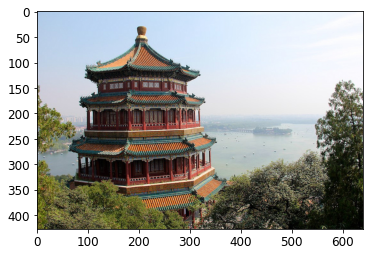

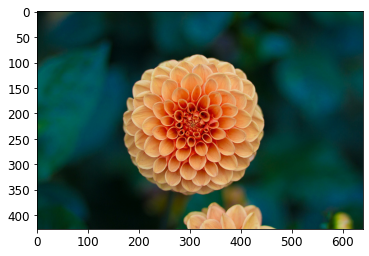

In [51]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

plt.imshow(china)
plt.show()
plt.imshow(flower)
plt.show()

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

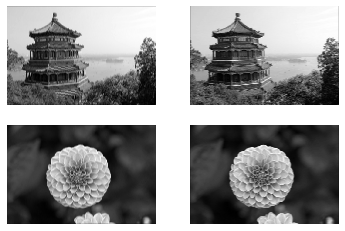

In [52]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [53]:
def my_conv(image, stride, filter):

  feature_map = list()
  filter_height = len(filter)
  filter_width = len(filter[0])

  for color in range(image.shape[-1]):
    color_conv = list()
    channel = image[:, :, color]

    for row_index in range(filter_height, len(image) - filter_height, stride):
      row_conv = list()
      for col_index in range(filter_width, len(image) - filter_width, stride):
        conv_square = list()
        for row_id in range(row_index, row_index + filter_height):
          conv_square.append(channel[row_id][col_index:col_index + filter_width])

        conv = np.sum(np.multiply(conv_square, filter))
        row_conv.append(conv)
        col_index += stride

      color_conv.append(row_conv)
      row_conv = list()
      row_index += stride

    feature_map.append(color_conv)
  feature_map = np.dstack(feature_map)


  return feature_map

### Filters:

- Blur: Makes adjacent pixels less distinct from each other by blending the values together
- Bottom Sobel: Shows the pixel difference from the bottom pixels in the convolution area
- Emboss: Shows the differnce in dixel values in a particular direction
- Identity: Does not change image but in this case slightly reduces dimensionality
- Left Sobel: Shows the pixel difference from the left pixels in the convolution area
- Outline: Highlights the pixel difference from the center picture in the convolution square to those adjacent to it.
- Right Sobel: Shows the pixel difference from the right pixels in the convolution area
- Sharpen: Similar to Outline with the exclusion of diagonal pixel values
- Top Sobel: Shows the pixel difference from the top pixels in the convolution area


In [54]:
filters = dict()

filters['blur'] = np.array([[0.0625, 0.125, 0.0625],[0.125, .25, 0.125],[0.0625, 0.125, 0.0625]])
filters['bottom sobel'] = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
filters['emboss'] = np.array([[-2, -1, 0],[-1, 1, 1],[0, 1, 2]])

filters['identity'] = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
filters['left sobel'] = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
filters['outline'] = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

filters['right sobel'] = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
filters['sharpen'] = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
filters['top sobel'] = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

Original
(427, 640, 3)


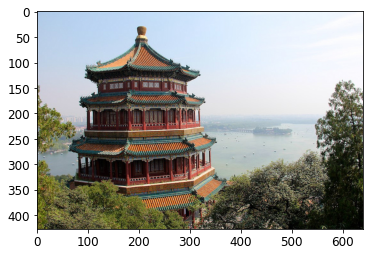

********************************
blur
(421, 421, 3)


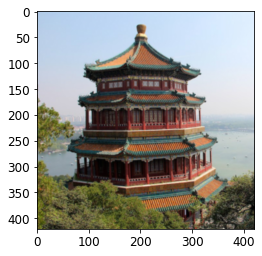

********************************
bottom sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


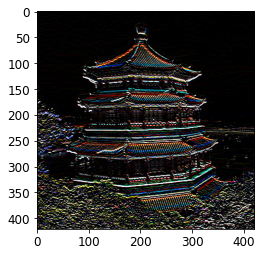

********************************
emboss


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


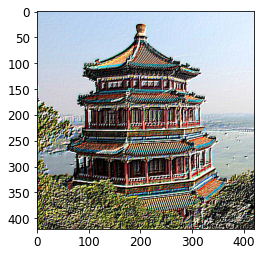

********************************
identity
(421, 421, 3)


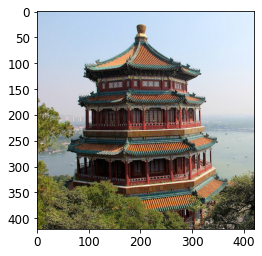

********************************
left sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


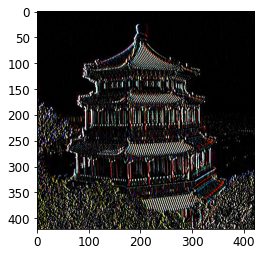

********************************
outline


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


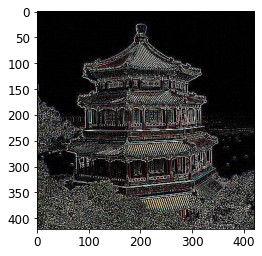

********************************
right sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


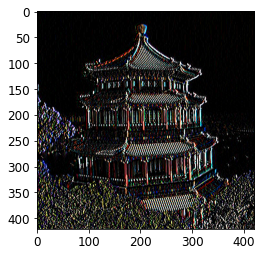

********************************
sharpen


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


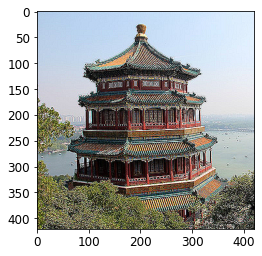

********************************
top sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


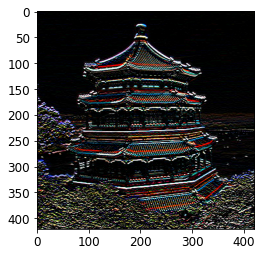

********************************


In [55]:
print("Original")
print(china.shape)
plt.imshow(china)
plt.show()
print("********************************")

for filter_name, filter in filters.items():
  print(filter_name)
  new_image = my_conv(china, 1, filter)
  print(new_image.shape)
  plt.imshow(new_image)
  plt.show()
  print("********************************")

Original
(427, 640, 3)


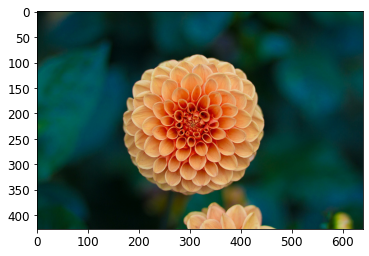

********************************
blur
(421, 421, 3)


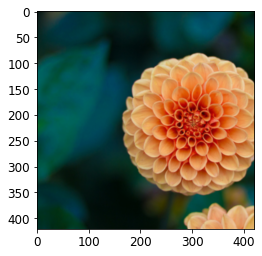

********************************
bottom sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


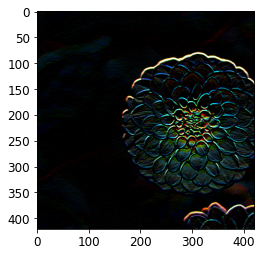

********************************
emboss


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


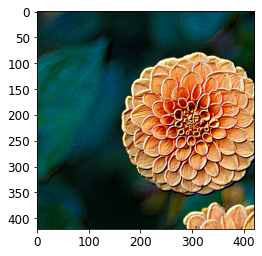

********************************
identity
(421, 421, 3)


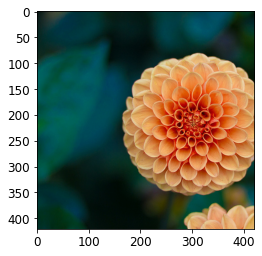

********************************
left sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


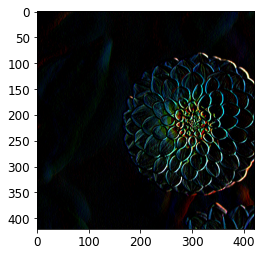

********************************
outline


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


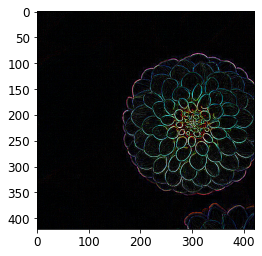

********************************
right sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


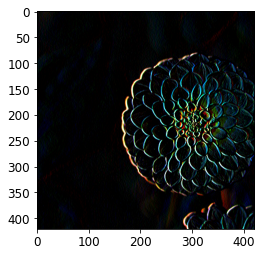

********************************
sharpen


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


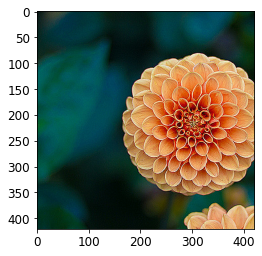

********************************
top sobel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(421, 421, 3)


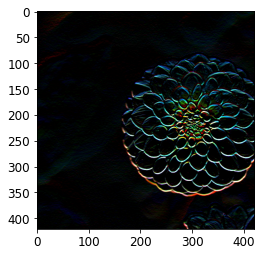

********************************


In [56]:
print("Original")
print(flower.shape)
plt.imshow(flower)
plt.show()
print("********************************")

for filter_name, filter in filters.items():
  print(filter_name)
  new_image = my_conv(flower, 1, filter)
  print(new_image.shape)
  plt.imshow(new_image)
  plt.show()
  print("********************************")